In [76]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

+ `name`: Название рассматриваемой страны
+ `landmass`: 1=Северная Америка, 2=Южная Америка, 3=Европа, 4=Африка, 4=Азия, 6=Океания
+ `zone`: Географический квадрант, основанный на меридиане и экваторе; 1=Северо-Восток, 2=Юго-Восток, 3=Юго-Запад, 4=Северо-Запад
+ `area`: Площадь в тысячах квадратных километров
+ `population`: Население в миллионах человек
+ `language`: Язык, где 1=Английский, 2=Испанский, 3=Французский, 4=Немецкий, 5=Славянский, 6=Другие индоевропейские языки, 7=Китайский, 8=Арабский, 9=Японский/Турецкий/Финский/Мадьярский, 10=Другие
+ >
  + `target` `religion`: Религия, где 0=Католическая, 1=Другие христианские, 2=Мусульманская, 3=Буддистская, 4=Индуистская, 5=Этническая, 6=Марксистская, 7=Другие
+ `bars`: Количество вертикальных полос на флаге
+ `stripes`: Количество горизонтальных полос на флаге
+ `colours`: Количество различных цветов на флаге
+ `red`: 0, если красного цвета нет, 1, если красный присутствует на флаге
+ `green`: То же для зеленого цвета
+ `blue`: То же для синего цвета
+ `gold`: То же для золотого (желтого) цвета
+ `white`: То же для белого цвета
+ `black`: То же для черного цвета
+ `orange`: То же для оранжевого (коричневого) цвета
+ `mainhue`: Преобладающий цвет на флаге (при равных значениях выбирается верхний цвет, затем центральный цвет, и если это не помогает, выбирается левый цвет)
+ `circles`: Количество кругов на флаге
+ `crosses`: Количество (вертикальных) крестов на флаге
+ `saltires`: Количество диагональных крестов на флаге
+ `quarters`: Количество четвертей на флаге
+ `sunstars`: Количество солнечных или звездных символов на флаге
+ `crescent`: 1, если присутствует символ полумесяца, иначе 0
+ `triangle`: 1, если есть какие-либо треугольники, иначе 0
+ `icon`: 1, если присутствует неживое изображение (например, лодка), иначе 0
+ `animate`: 1, если присутствует анимированное изображение (например, орел, дерево, человеческая рука), иначе 0
+ `text`: 1, если есть буквы или надписи на флаге (например, девиз или слоган), иначе 0
+ `topleft`: Цвет в верхнем левом углу (при равном выборе двигается вправо для разрешения примирения)
+ `botright`: Цвет в нижнем левом углу (при равном выборе двигается влево для разрешения примирения)

# laboratory_1

In [77]:
columns = [
    "name", "landmass", "zone", "area", "population", "language", "religion", "bars", "stripes", "colours",
    "red", "green", "blue", "gold", "white", "black", "orange", "mainhue", "circles", "crosses", "saltires", "quarters",
    "sunstars", "crescent", "triangle", "icon", "animate", "text", "topleft", "botright"
]

In [78]:
df = pd.read_csv('../../src/flag.data', header=None, names=columns)

In [79]:
missing_data = df.isnull().sum()
print(missing_data)

name          0
landmass      0
zone          0
area          0
population    0
language      0
religion      0
bars          0
stripes       0
colours       0
red           0
green         0
blue          0
gold          0
white         0
black         0
orange        0
mainhue       0
circles       0
crosses       0
saltires      0
quarters      0
sunstars      0
crescent      0
triangle      0
icon          0
animate       0
text          0
topleft       0
botright      0
dtype: int64


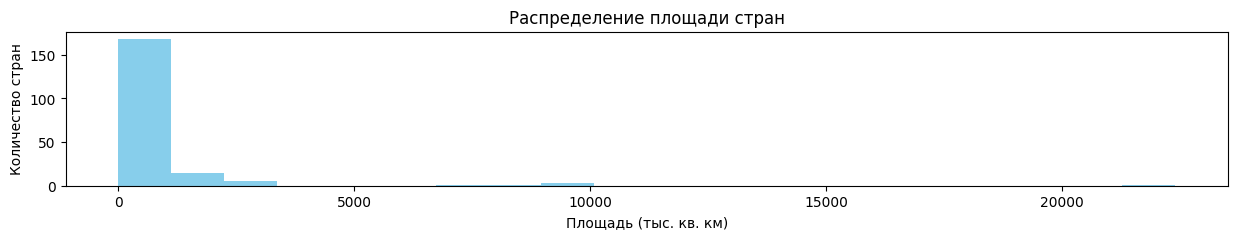

In [80]:
import matplotlib.pyplot as plt

# График распределения площади стран
plt.figure(figsize=(15, 2))
plt.hist(df['area'], bins=20, color='skyblue')
plt.title('Распределение площади стран')
plt.xlabel('Площадь (тыс. кв. км)')
plt.ylabel('Количество стран')
plt.show()

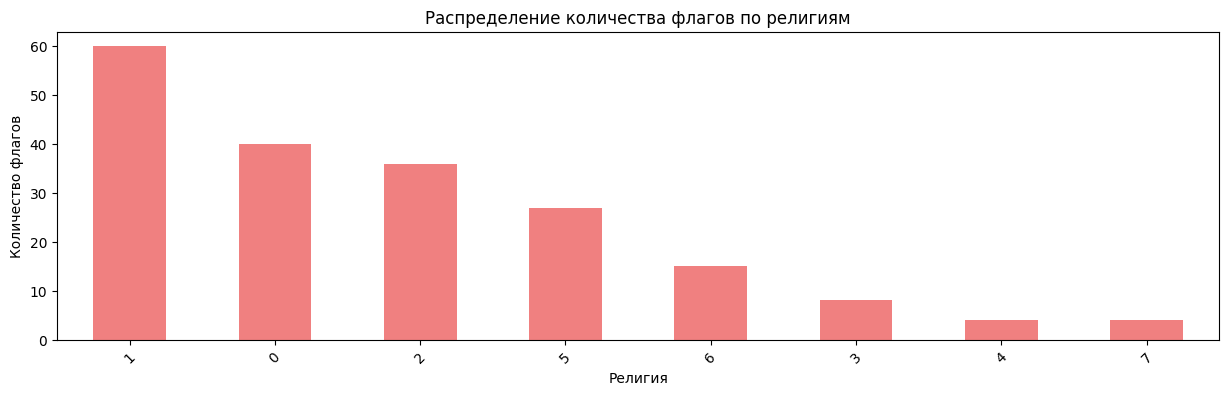

In [81]:
# График распределения количества флагов по религиям
religion_counts = df['religion'].value_counts()
plt.figure(figsize=(15, 4))
religion_counts.plot(kind='bar', color='lightcoral')
plt.title('Распределение количества флагов по религиям')
plt.xlabel('Религия')
plt.ylabel('Количество флагов')
plt.xticks(rotation=45)
plt.show()

In [82]:
from sklearn.model_selection import train_test_split

df = pd.get_dummies(df) * 1
X = df.drop(['religion'], axis=1)
y = df['religion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [83]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [84]:
from sklearn.metrics import classification_report

religion_labels = {
    0: "Catholic",
    1: "Other Christian",
    2: "Muslim",
    3: "Buddhist",
    4: "Hindu",
    5: "Ethnic",
    6: "Marxist",
    7: "Others"
}

# Предсказание на обучающем множестве
y_train_pred = model.predict(X_train)

accuracy_train = model.score(X_train, y_train)
accuracy_test = model.score(X_test, y_test)
print(f"Accuracy on Training Set: {accuracy_train:.2f}")
print(f"Accuracy on Testing Set: {accuracy_test:.2f}")

print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred, target_names=[religion_labels[i] for i in range(8)]))

y_test_pred = model.predict(X_test)
print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred, target_names=[religion_labels[i] for i in range(8)]))

Accuracy on Training Set: 1.00
Accuracy on Testing Set: 0.63
Classification Report for Training Set:
                 precision    recall  f1-score   support

       Catholic       1.00      1.00      1.00        17
Other Christian       1.00      1.00      1.00        27
         Muslim       1.00      1.00      1.00        23
       Buddhist       1.00      1.00      1.00         6
          Hindu       1.00      1.00      1.00         2
         Ethnic       1.00      1.00      1.00        12
        Marxist       1.00      1.00      1.00         8
         Others       1.00      1.00      1.00         2

       accuracy                           1.00        97
      macro avg       1.00      1.00      1.00        97
   weighted avg       1.00      1.00      1.00        97

Classification Report for Testing Set:
                 precision    recall  f1-score   support

       Catholic       0.94      0.65      0.77        23
Other Christian       0.72      0.79      0.75        33
 

d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


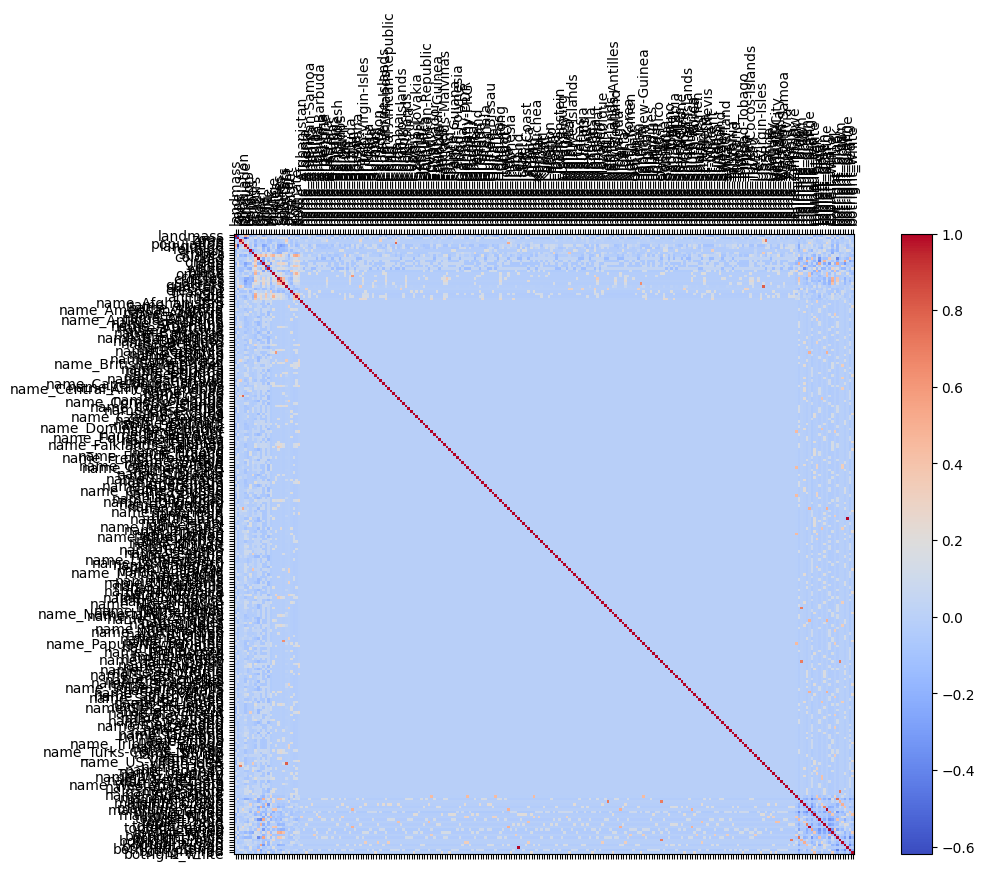

In [85]:
correlation_matrix = df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

df = pd.read_csv('../../src/flag.data', header=None, names=columns)
df = pd.get_dummies(df) * 1

religion_labels = {
    0: "Catholic",
    1: "Other Christian",
    2: "Muslim",
    3: "Buddhist",
    4: "Hindu",
    5: "Ethnic",
    6: "Marxist",
    7: "Others"
}

merged_religion_labels = {
    0: "Christianity",
    1: "Christianity",
    2: "Islam",
    3: "Other",
    4: "Other",
    5: "Other",
    6: "Other",
    7: "Other"
}

df['religion'] = df['religion'].replace(merged_religion_labels)
X = df.drop(['religion'], axis=1)
y = df['religion']

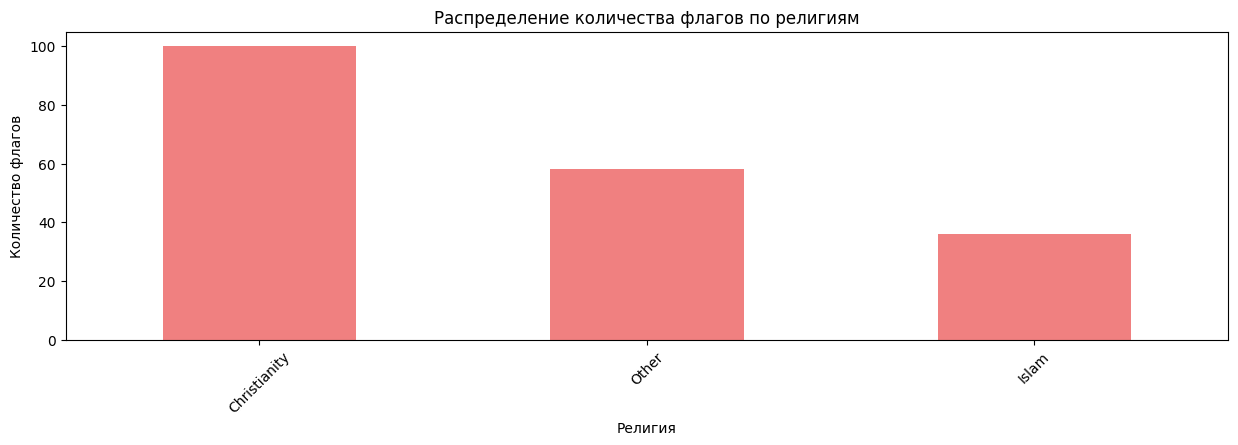

In [87]:
religion_counts = df['religion'].value_counts()
plt.figure(figsize=(15, 4))
religion_counts.plot(kind='bar', color='lightcoral')
plt.title('Распределение количества флагов по религиям')
plt.xlabel('Религия')
plt.ylabel('Количество флагов')
plt.xticks(rotation=45)
plt.show()

In [88]:
threshold = 0.05

# Шаг 1: Фильтрация признаков на основе важности
importances = model_resampled.feature_importances_
feature_names = X.columns
feature_importance = list(zip(feature_names, importances))
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Фильтрация признаков, оставляем только те, у которых важность выше порога
selected_features = [feature for feature, importance in feature_importance if importance > threshold]

# Фильтрация массива признаков
X_selected = X[selected_features]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

oversampler = SMOTE(sampling_strategy='auto', random_state=42)
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

# Обучение модели с усредненными данными
model_resampled = RandomForestClassifier(random_state=42)
model_resampled.fit(X_train_resampled, y_train_resampled)

# Оценка производительности модели
y_test_pred = model.predict(X_test)
y_test_pred_resampled = model_resampled.predict(X_test)

print("Classification Report for Original Data:")
print(classification_report(y_test, y_test_pred))

print("Classification Report for Resampled Data:")
print(classification_report(y_test, y_test_pred_resampled))

accuracy_train = model.score(X_train, y_train)
accuracy_test = model.score(X_test, y_test)
print(f"Accuracy on Training Set (Original Data): {accuracy_train:.2f}")
print(f"Accuracy on Testing Set (Original Data): {accuracy_test:.2f}")

accuracy_train_resampled = model_resampled.score(X_train_resampled, y_train_resampled)
accuracy_test_resampled = model_resampled.score(X_test, y_test_pred_resampled)
print(f"Accuracy on Training Set (Resampled Data): {accuracy_train_resampled:.2f}")
print(f"Accuracy on Testing Set (Resampled Data): {accuracy_test_resampled:.2f}")


Classification Report for Original Data:
              precision    recall  f1-score   support

Christianity       0.86      0.86      0.86        21
       Islam       0.50      0.25      0.33         4
       Other       0.62      0.71      0.67        14

    accuracy                           0.74        39
   macro avg       0.66      0.61      0.62        39
weighted avg       0.74      0.74      0.74        39

Classification Report for Resampled Data:
              precision    recall  f1-score   support

Christianity       0.81      0.81      0.81        21
       Islam       0.50      0.50      0.50         4
       Other       0.64      0.64      0.64        14

    accuracy                           0.72        39
   macro avg       0.65      0.65      0.65        39
weighted avg       0.72      0.72      0.72        39

Accuracy on Training Set (Original Data): 1.00
Accuracy on Testing Set (Original Data): 0.74
Accuracy on Training Set (Resampled Data): 1.00
Accuracy on Te

In [90]:
importances = model_resampled.feature_importances_
feature_names = X.columns
feature_importance = list(zip(feature_names, importances))
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

for feature, importance in feature_importance:
    print(f"Feature: {feature}, Importance: {importance:.2f}")

threshold = 0.05  # Порог важности (по вашему усмотрению)
selected_features = [feature for feature, importance in feature_importance if importance > threshold]
X_selected = X[selected_features]

print("Selected Features:")
print(selected_features)

Feature: language, Importance: 0.10
Feature: landmass, Importance: 0.10
Feature: area, Importance: 0.09
Feature: population, Importance: 0.07
Feature: zone, Importance: 0.07
Feature: blue, Importance: 0.04
Feature: colours, Importance: 0.03
Feature: sunstars, Importance: 0.03
Feature: stripes, Importance: 0.03
Feature: gold, Importance: 0.03
Feature: white, Importance: 0.02
Feature: green, Importance: 0.02
Feature: bars, Importance: 0.02
Feature: botright_red, Importance: 0.02
Feature: mainhue_red, Importance: 0.01
Feature: crosses, Importance: 0.01
Feature: botright_blue, Importance: 0.01
Feature: mainhue_white, Importance: 0.01
Feature: botright_green, Importance: 0.01
Feature: topleft_red, Importance: 0.01
Feature: mainhue_blue, Importance: 0.01
Feature: red, Importance: 0.01
Feature: topleft_white, Importance: 0.01
Feature: circles, Importance: 0.01
Feature: topleft_green, Importance: 0.01
Feature: mainhue_green, Importance: 0.01
Feature: animate, Importance: 0.01
Feature: topleft_

In [91]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Определение базовых моделей
base_models = [
    ('original', model),  # Базовая модель на исходных данных
    ('resampled', model_resampled)  # Базовая модель на усредненных данных
]

# Определение метамодели
meta_model = LogisticRegression()

# Создание стекинга
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Обучение стекинга
stacking_model.fit(X_train, y_train)

# Прогнозы стекинга на тестовых данных
y_test_pred_stacking = stacking_model.predict(X_test)

# Вывод результатов стекинга
print("Classification Report for Stacking Model:")
print(classification_report(y_test, y_test_pred_stacking))

accuracy_test_stacking = stacking_model.score(X_test, y_test_pred_stacking)
print(f"Accuracy on Testing Set (Stacking Model): {accuracy_test_stacking:.2f}")

Classification Report for Stacking Model:
              precision    recall  f1-score   support

Christianity       0.86      0.86      0.86        21
       Islam       0.33      0.25      0.29         4
       Other       0.60      0.64      0.62        14

    accuracy                           0.72        39
   macro avg       0.60      0.58      0.59        39
weighted avg       0.71      0.72      0.71        39

Accuracy on Testing Set (Stacking Model): 1.00
